# Linear Regression and Learning Curve challenges

Challenge 1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

Challenge 2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared
AIC
Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import pandas as pd
import numpy as np
import pickle
import re
import datetime as dt
import scipy.stats as stats
import random

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from operator import itemgetter, attrgetter, methodcaller

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split 
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [81]:
def plot_res(y, pred):
    res = y - pred
    
    plt.figure(figsize=(20,5))
    plt.subplot(1, 2, 1)
    plt.scatter(y, pred)
    plt.plot(np.linspace(y.min()-0.01*np.mean(y), y.max()+0.01*np.mean(y), 1000),
         np.linspace(y.min()-0.01*np.mean(y), y.max()+0.01*np.mean(y), 1000),
        color='m', linestyle='--')
    plt.title("Actual vs. Predicted", size=15)
    plt.xlabel("Actual", size=15)
    plt.ylabel("Predicted", size=15)

    plt.subplot(1, 2, 2)
    plt.scatter(pred, res)
    plt.plot(np.linspace(pred.min()-0.01*np.mean(pred), pred.max()+0.01*np.mean(pred), 1000),
             np.linspace(0, 0, 1000),
             color='m', linestyle='--')
    plt.title("Residual plot of Y-Predict", size=15)
    plt.xlabel("Prediction", size=15)
    plt.ylabel("Residuals", size=15)

__Challenge 1__  
Generate (fake) data that is linearly related to log(x).  
You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)
Simulate some data from this model.  
Then fit two models to it:  
quadratic (second degree polynomial) logarithmic (log(x)) (The second one should fit really well, since it has the same form as the underlying model!)  

Text(0,0.5,'Y')

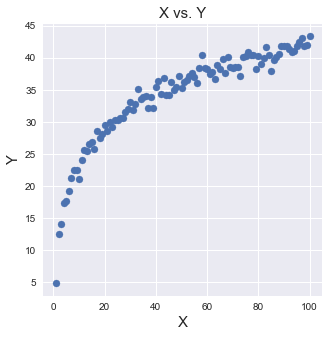

In [80]:
# generate the data
B0=5
B1=8
x=np.arange(1,101,1)
np.random.seed(99)
epsilon=np.random.randn(len(x), )
y = B0 + B1*np.log(x) + epsilon

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.title("X vs. Y", size=15)
plt.xlabel("X", size=15)
plt.ylabel("Y", size=15)

Parameters:  [ 22.52950536   0.23028645]
Adjusted R2:  0.801963659849


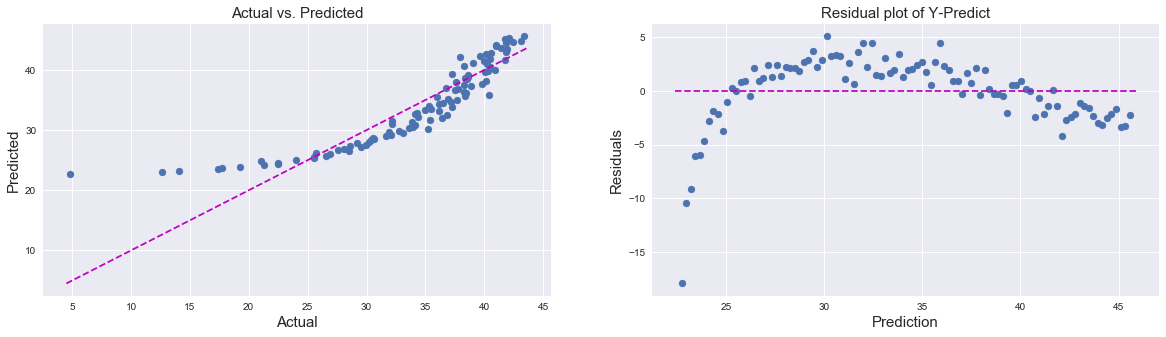

In [102]:
# fit a linear model
model = sm.OLS(y, sm.add_constant(x))
fit = model.fit()
fit.summary()
print('Parameters: ', fit.params)
print('Adjusted R2: ', fit.rsquared_adj)
pred = fit.predict(sm.add_constant(x))
plot_res(y, pred)

In [83]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

In [84]:
# fit a polynomial
poly = PolynomialFeatures(2)
x=x.reshape(-1, 1)
ssX = StandardScaler()
X_scaled = ssX.fit_transform(x)
X_scaled2 = poly.fit_transform(X_scaled)

Parameters:  [ 37.00198534   6.64746475  -2.84301434]
Adjusted R2:  0.919956456418


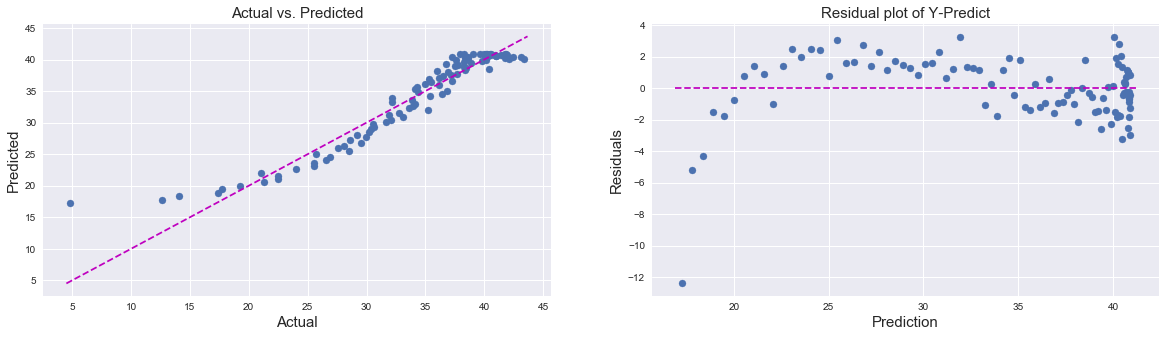

In [103]:
model = sm.OLS(y, X_scaled2)
fit = model.fit()
fit.summary()
print('Parameters: ', fit.params)
print('Adjusted R2: ', fit.rsquared_adj)
pred = fit.predict(X_scaled2)
plot_res(y, pred)

Parameters:  [ 5.80488686  0.01145086  7.63618615]
Adjusted R2:  0.982209995821


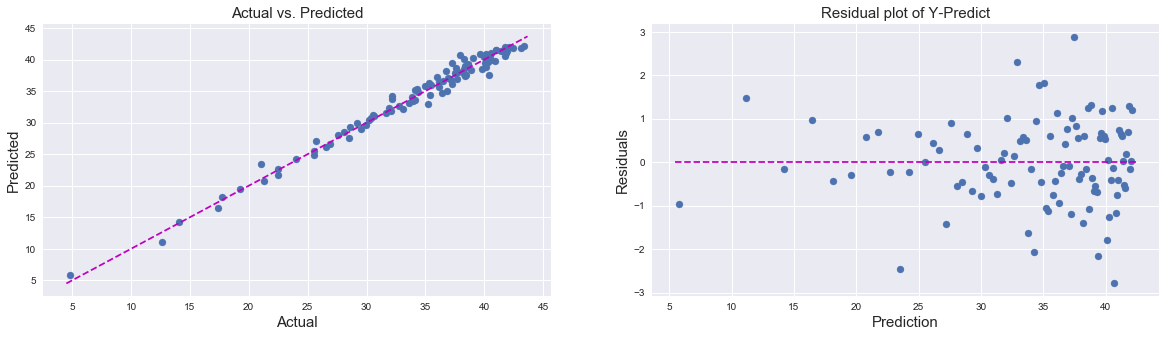

In [104]:
# fit a Log
x2=np.concatenate((x, np.log(x)), axis = 1) 
model = sm.OLS(y, sm.add_constant(x2))
fit = model.fit()
fit.summary()
print('Parameters: ', fit.params)
print('Adjusted R2: ', fit.rsquared_adj)
pred = fit.predict(sm.add_constant(x2))
plot_res(y, pred)

__Challenge 2__  
Generate (fake) data from a model of the form B0 + B1x + B2x^2 + epsilon. (You are making up the parameters.)  
Split the data into a training and test set.  
Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.
(You could use sklearn.metrics.mean_squared_error.)  

Text(0,0.5,'Y')

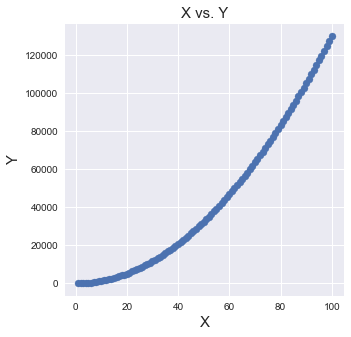

In [112]:
# generate the data
B0=5
B1=8
B2=13
x=np.arange(1,101,1)
np.random.seed(99)
epsilon=np.random.randn(len(x), )
y = B0 + B1*np.log(x) + B2*x**2 + epsilon

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.title("X vs. Y", size=15)
plt.xlabel("X", size=15)
plt.ylabel("Y", size=15)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=99)

In [110]:
# fit a polynomial
poly = PolynomialFeatures(2)
X_train=X_train.reshape(-1, 1)
ssX = StandardScaler()
X_train_scaled = ssX.fit_transform(X_train)
X_train_scaled = poly.fit_transform(X_train_scaled)

X_test=X_test.reshape(-1, 1)
X_test_scaled = ssX.transform(X_test)
X_test_scaled = poly.transform(X_test_scaled)

Parameters:  [ 35787.08418482  39396.56904012  10847.32494745]
Adjusted R2:  0.999999996773
RMSE on train:  2.2149728903
RMSE on test:  1.6942531461
AIC on train:  338.126804623


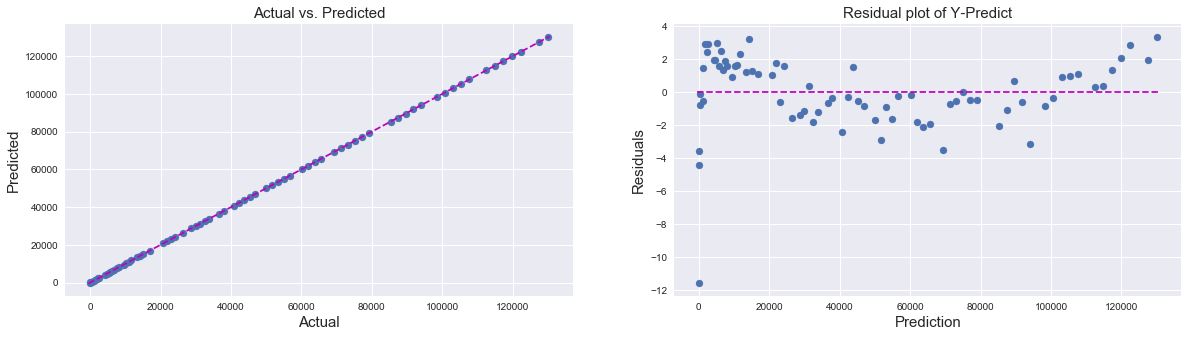

In [118]:
model = sm.OLS(y_train, X_train_scaled)
fit = model.fit()
fit.summary()

pred_train = fit.predict(X_train_scaled)
plot_res(y_train, pred_train)
RMSE_train = np.sqrt(np.mean((y_train - pred_train)**2))
print('Parameters: ', fit.params)
print('Adjusted R2: ', fit.rsquared_adj)
print('RMSE on train: ', RMSE_train)

pred_test = fit.predict(X_test_scaled)
RMSE_test = np.sqrt(np.mean((y_test - pred_test)**2))
print('RMSE on test: ', RMSE_test)
print('AIC on train: ', fit.aic)

__Challenge 3__  
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:  training error, test error, R squared, AIC 

In [149]:
def fit_poly(degree, X_train, y_train, X_test, y_test):
    poly = PolynomialFeatures(degree)
    X_train=X_train.reshape(-1, 1)
    ssX = StandardScaler()
    X_train_scaled = ssX.fit_transform(X_train)
    X_train_scaled = poly.fit_transform(X_train_scaled)

    X_test=X_test.reshape(-1, 1)
    X_test_scaled = ssX.transform(X_test)
    X_test_scaled = poly.transform(X_test_scaled)

    model = sm.OLS(y_train, X_train_scaled)
    fit = model.fit()

    pred_train = fit.predict(X_train_scaled)
#     plot_res(y_train, pred_train)
    RMSE_train = np.sqrt(np.mean((y_train - pred_train)**2))

    pred_test = fit.predict(X_test_scaled)
    RMSE_test = np.sqrt(np.mean((y_test - pred_test)**2))
    
    return ({'Adj_R2': fit.rsquared_adj, 
             'RMSE_train': RMSE_train, 
             'RMSE_test': RMSE_test, 
             'AIC': fit.aic
            })

In [150]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=99)

In [154]:
Adj_R2=[]
RMSE_train=[]
RMSE_test=[]
AIC=[]

for i in range(8):
    results = fit_poly(i, X_train, y_train, X_test, y_test)
    Adj_R2.append(results['Adj_R2'])
    RMSE_train.append(results['RMSE_train'])
    RMSE_test.append(results['RMSE_test'])
    AIC.append(results['AIC'])

Text(0.5,1,'Model Degree effects on Model Fit')

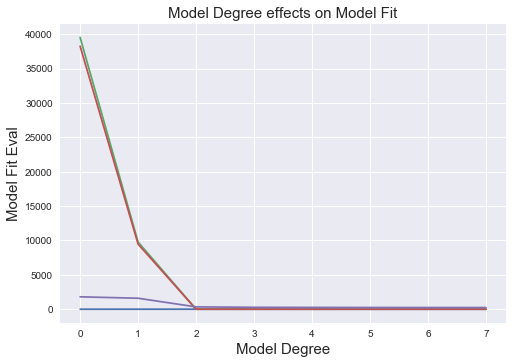

In [183]:
degree=list(range(8))
plt.plot(degree, Adj_R2)
plt.plot(degree, RMSE_train)
plt.plot(degree, RMSE_test)
plt.plot(degree, AIC)
plt.legend(handles=[Adj_R2, RMSE_train, RMSE_test, AIC], labels=['Adj_R2', 'RMSE_train', 'RMSE_test', 'AIC'], 
           loc='upper right', bbox_to_anchor=(0.3, 0.3))
plt.xlabel('Model Degree', size=15)
plt.ylabel('Model Fit Eval', size=15)
plt.title('Model Degree effects on Model Fit', size=15)

__Challenge 4__  
For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.